In [6]:
import numpy

nsamples = int(1e4)

def quartic(x):
	return numpy.exp(-x**4)

def quartic_hs_transform(x, nsamples = nsamples):
    k = numpy.random.randn(nsamples)
    fx = numpy.exp(-1.j*numpy.sqrt(2)*k*x**2) 
    # return fx.mean(), fx.std()/numpy.sqrt(nsamples)
    return fx

def quartic_double_hs_transform(x, nsamples = nsamples):
    k = numpy.random.randn(nsamples)
    l = numpy.random.randn(nsamples)
    b = 2. * 1.j * numpy.sqrt(2)*k 
    fx = numpy.exp(-1.j*numpy.sqrt(b)*l*x) 
    # return fx.mean(), fx.std()/numpy.sqrt(nsamples)
    return fx

def quartic_hs_transform_sigma(x, nsamples = nsamples):
    k = numpy.random.randn(nsamples)
    #print("k mean = ", k.mean())
    #print("k std = ", k.std())
    fx = numpy.exp(-1.j*numpy.sqrt(2)*k*x**2) 
    return fx.real.mean(), fx.real.std()

def quartic_double_hs_transform_sigma(x, nsamples = nsamples):
    k = numpy.random.randn(nsamples)
    l = numpy.random.randn(nsamples)
    #print("k mean = ", k.mean())
    #print("k std = ", k.std())
    #print("l mean = ", l.mean())
    #print("l std = ", l.std())
    b = 2. * 1.j * numpy.sqrt(2)*k 
    fx = numpy.exp(-1.j*numpy.sqrt(b)*l*x).ravel()
    return fx.real.mean(), fx.real.std()

def quartic_double_hs_uniform(x, nsamples = 100):
    k = numpy.random.uniform(-10,10,nsamples)
    l = numpy.random.uniform(-10,10,nsamples)
    print("k mean = ", k.mean())
    print("k std = ", k.std())
    print("l mean = ", l.mean())
    print("l std = ", l.std())
    b = 2. * 1.j * numpy.sqrt(2)*k 
    fx = numpy.zeros((nsamples, nsamples),dtype = numpy.complex128)
    for i in range(nsamples):
        for j in range(nsamples):
            fx[i,j] = numpy.exp(-k[i]**2/2) * numpy.exp(-l[j]**2/2) * numpy.exp(numpy.emath.sqrt(b[i])*l[j]*x)/(2*numpy.pi) * 400
    fx = fx.ravel()
    return fx.real.mean(), fx.real.std()

def quartic_double_hs_halfgs(x, nsamples = nsamples):
    rng = np.random.default_rng()
    


x = numpy.random.randn(10)
print(x[0])
print(quartic(x[0]))
print(quartic_hs_transform(x[0]))
print(quartic_hs_transform_sigma(x[0]))
print(quartic_double_hs_transform(x[0]))
print(quartic_double_hs_transform_sigma(x[0]))
print(quartic_double_hs_uniform(x[0]))
# quartic_res = numpy.array([quartic(xi) for xi in x])
# hs_res = numpy.array([quartic_hs_transform_sigma(xi)[0] for xi in x])
# double_hs_res = numpy.array([quartic_double_hs_transform_sigma(xi)[0] for xi in x])
# print(numpy.linalg.norm(hs_res - quartic_res))
# print(numpy.linalg.norm(double_hs_res - quartic_res))


0.38187577043394255
0.9789584020628089
[0.98657061-0.16333532j 0.99945134-0.0331214j  0.95422934+0.29907584j ...
 0.99454852+0.10427486j 0.97734274-0.21166286j 0.99808512-0.06185544j]
(0.9786334890135213, 0.030429609292002485)
[0.99882551-0.00117311j 0.91295764+0.07986225j 1.26880628+0.36062181j ...
 0.83071634+0.14328901j 0.40113555-0.31775837j 0.9577524 +0.04051048j]
(0.9759762787784101, 0.3597312773621155)
k mean =  -0.7829556561533525
k std =  5.1721648909766795
l mean =  0.19008763647462587
l std =  5.931682096531431
(1.25138067767977, 6.577011605029763)


In [11]:
y = 0.1
print(y)
print(quartic(y))
print(quartic_hs_transform_sigma(y))
print(quartic_double_hs_transform_sigma(y)[0].real, quartic_double_hs_transform_sigma(y)[1])

0.1
0.9999000049998333
(0.9999022747141862, 0.00013413372062497485)
0.999432921619295 0.10505505696134879


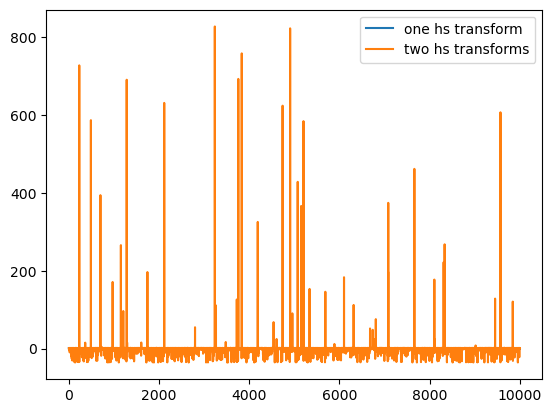

In [89]:
import matplotlib.pyplot as plt

samples = numpy.array([i for i in range(nsamples)])
fx = quartic_hs_transform(x[0])
fx2 = quartic_double_hs_transform(x[0])
plt.plot(fx.real, label="one hs transform")
plt.plot(fx2.real, label="two hs transforms")
plt.legend()
plt.show()

In [29]:
#test sqrt() in complex plane
y = numpy.linspace(-1,1,101)
print(numpy.sqrt(2*1j*numpy.sqrt(2)*y))

[1.18920712-1.18920712j 1.17725498-1.17725498j 1.16518025-1.16518025j
 1.15297908-1.15297908j 1.14064739-1.14064739j 1.12818093-1.12818093j
 1.11557516-1.11557516j 1.10282531-1.10282531j 1.08992632-1.08992632j
 1.07687284-1.07687284j 1.06365918-1.06365918j 1.05027929-1.05027929j
 1.03672673-1.03672673j 1.02299464-1.02299464j 1.0090757 -1.0090757j
 0.99496206-0.99496206j 0.98064531-0.98064531j 0.96611643-0.96611643j
 0.95136569-0.95136569j 0.93638262-0.93638262j 0.92115587-0.92115587j
 0.90567316-0.90567316j 0.88992112-0.88992112j 0.87388519-0.87388519j
 0.85754945-0.85754945j 0.84089642-0.84089642j 0.82390686-0.82390686j
 0.80655951-0.80655951j 0.78883076-0.78883076j 0.77069429-0.77069429j
 0.75212062-0.75212062j 0.7330765 -0.7330765j  0.71352427-0.71352427j
 0.69342095-0.69342095j 0.67271713-0.67271713j 0.65135556-0.65135556j
 0.62926926-0.62926926j 0.60637903-0.60637903j 0.58259013-0.58259013j
 0.55778758-0.55778758j 0.53182959-0.53182959j 0.50453785-0.50453785j
 0.47568285-0.4756828

In [76]:
new_sqrt(-1j)

(-0.7071067811865475+0.7071067811865476j)